In [1]:
import numpy as np
import matplotlib.pyplot as plt

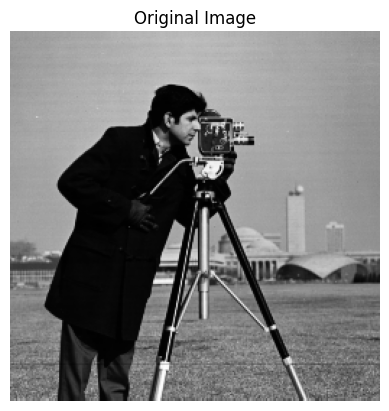

In [17]:
# Import the image from file
A = plt.imread("cameraman.tif")  # Load the grayscale image (TIFF format)

# Convert image to float64 for mathematical operations (e.g., SVD, noise addition)
A = A.astype(np.float64)

# Display the image in grayscale
plt.imshow(A, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()


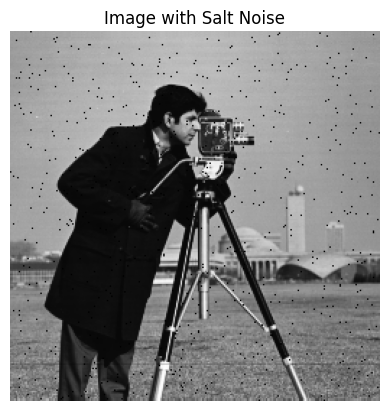

In [20]:
# Create a copy of the original image to apply salt noise (black dots)
B = np.array(A)

# Loop through each pixel in the 256x256 image
for i in range(256):
    for j in range(256):
        # With 1% probability, set the pixel value to 0 (black)
        if np.random.rand() < 0.01:
            B[i, j] = 0  # Adding 'salt noise' (impulse noise)

# Store the noisy image
noisy_img = B

# Display the noisy image
plt.imshow(noisy_img, cmap="gray")
plt.title("Image with Salt Noise")
plt.axis("off")
plt.show()


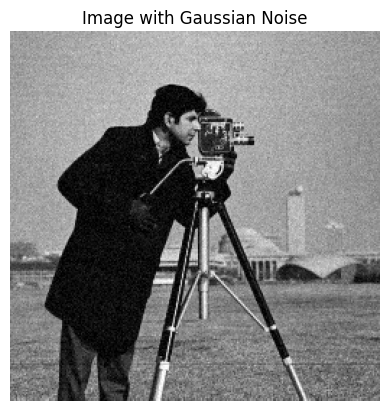

Number of pixels in noise array: 65536
Number of pixels in image: 65536


In [21]:
# Set parameters for Gaussian noise
mean = 0       # Mean of the Gaussian distribution
sigma = 10     # Standard deviation (controls the noise intensity)

# Use the original image as base for adding noise
B = A  # Note: normalization (e.g., A/255) is commented out; pixels remain in 0–255

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, sigma, B.shape)

# Add noise to the image
noisy_img = B + noise

# Clip pixel values to ensure they stay in the valid range [0, 255]
noisy_img = np.clip(noisy_img, 0, 255)

# Display the noisy image
plt.imshow(noisy_img, cmap="gray")
plt.title("Image with Gaussian Noise")
plt.axis("off")
plt.show()

# Print the total number of pixels in the noise and image
print("Number of pixels in noise array:", noise.size)
print("Number of pixels in image:", B.size)


Modified Singular Values:
[32054.95279166  7220.08772822  5479.72033761  3099.49394385
  2935.92883416  2415.52067818  2308.29941481  1818.42583615
  1697.38584251  1592.68999509  1538.0436075   1487.15824284
  1465.36411376  1420.79266891  1312.94768859  1216.30458615
  1173.39023528  1124.08938499  1013.58687078  1010.39269323
   941.93937395   899.48549747   862.38620989   836.11608587
   824.73507068   797.24704677   758.86373284   713.76191571
   707.33210092   704.03229884   687.34029308   653.59894595
   648.85183019   615.90869787   599.32618074   596.53247807
   585.27837706   575.7073137    561.2923228    543.08633521
   538.62535375   526.62191618   520.99036157   506.59869333
   489.6725683    477.23737075   464.27783042   461.92844053
   456.48200779   449.50792438     0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.        

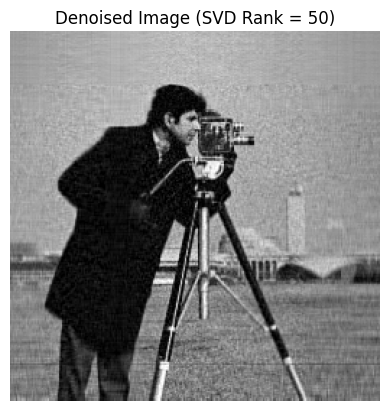

In [22]:
# -------------------------------
# Step: Image Denoising using SVD
# -------------------------------

# Perform Singular Value Decomposition on the noisy image
# U: left singular vectors, Se: singular values, V: right singular vectors
U, Se, V = np.linalg.svd(noisy_img)

# Choose how many singular values to keep (rank)
i = 50  # Keep only top 50 singular values for reconstruction (compression + denoising)

# Zero out the smaller singular values to reduce noise
Se[i:256] = 0  # Set the remaining (low-energy) components to zero

# Optional: print the modified singular values
print("Modified Singular Values:")
print(Se)

# Reconstruct the image using reduced SVD components
# U[:, :i]: first i columns of U
# np.diag(Se[:i]): diagonal matrix of top i singular values
# V[:i, :]: first i rows of V
A_R = U[:, :i] @ np.diag(Se[:i]) @ V[:i, :]

# Clip pixel values to the valid range [0, 255]
A_R = np.clip(A_R, 0, 255)

# Display the denoised image
plt.imshow(A_R, cmap="gray")
plt.title(f"Denoised Image (SVD Rank = {i})")
plt.axis("off")
plt.show()


In [24]:
# -----------------------------------
# Step: Compute MSE and PSNR Metrics
# -----------------------------------

# Step 1: Calculate Mean Squared Error (MSE)

# MSE between original and noisy image (to measure noise level)
mse_n = np.mean((A - noisy_img) ** 2)

# MSE between original and denoised image (to measure reconstruction quality)
mse_d = np.mean((A - A_R) ** 2)

# Step 2: Calculate PSNR (Peak Signal-to-Noise Ratio)

# PSNR formula uses maximum possible pixel value, which is 255 for 8-bit images
max_pixel = 255.0

# PSNR for noisy image
psnr_n = 10 * np.log10((max_pixel ** 2) / mse_n)

# PSNR for denoised image
psnr_d = 10 * np.log10((max_pixel ** 2) / mse_d)

# Step 3: Print PSNR values
print("PSNR between Original and Noisy Image:", psnr_n,)
print("PSNR between Original and Denoised Image:", psnr_d,)


PSNR between Original and Noisy Image: 28.281078570199263
PSNR between Original and Denoised Image: 28.109717577556445


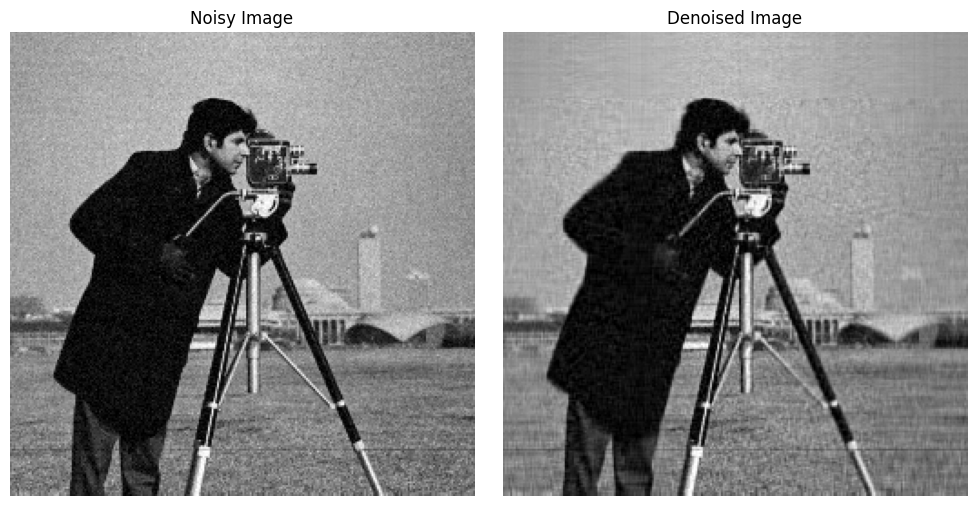

In [25]:
# ------------------------------------------------
# Step: Display Noisy and Denoised Images Side-by-Side
# ------------------------------------------------

# Create a new figure with specific size (10 inches wide, 5 inches tall)
plt.figure(figsize=(10, 5))

# Display the first image (Gaussian Noisy Image)
plt.subplot(1, 2, 1)                # 1 row, 2 columns, 1st subplot
plt.imshow(noisy_img, cmap='gray') # Show noisy image in grayscale
plt.title('Noisy Image')           # Title for the first subplot
plt.axis('off')                    # Hide axes for cleaner display

# Display the second image (Denoised Image using SVD)
plt.subplot(1, 2, 2)               # 1 row, 2 columns, 2nd subplot
plt.imshow(A_R, cmap='gray')      # Show denoised image in grayscale
plt.title('Denoised Image')       # Title for the second subplot
plt.axis('off')                   # Hide axes for cleaner display

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


Singular Values for Compression:
[32035.60975105  7237.89114438  5484.13756484  3109.33866911
  2936.22634859  2421.92625949  2305.56685112  1818.41668488
  1684.06254641  1583.62415452  1535.43999863  1488.91490976
  1437.93117175  1425.99307575  1280.98592598  1197.09957761
  1143.41165645  1117.30464948   995.31662734   988.83863871
   916.87685427   859.87157517   807.75587932   798.63112552
   781.2903338    759.79057289   728.32644238   681.20342362
   673.37341052   670.60500189   644.48034115   622.06587296
   606.63433176   582.06739749   571.97633045   550.22319806
   533.51863511   530.35940518   518.96012929   498.95863698
   496.81605085   478.48537932   465.57533277   463.14968201
   448.83975443   430.01355592   426.03476113   423.21108412
   418.27246923   398.83075989     0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0. 

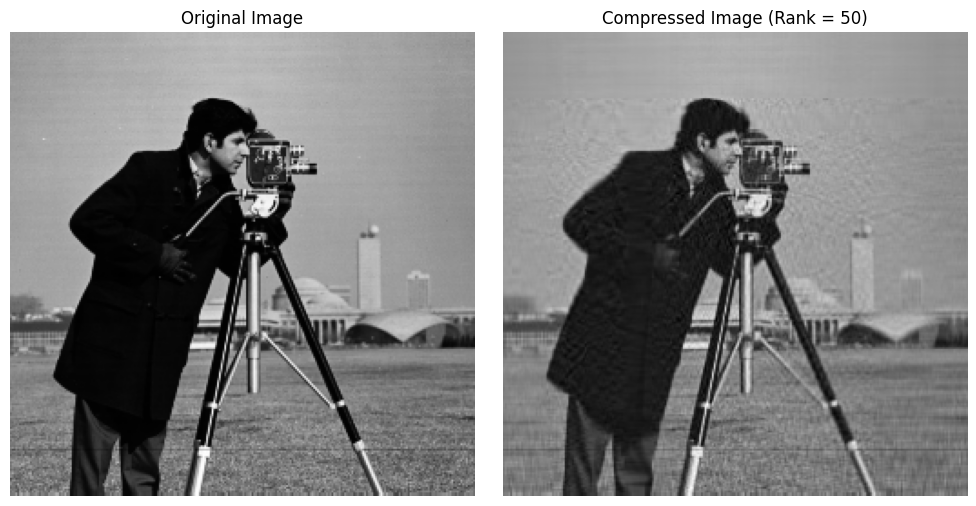

In [27]:
# ------------------------------------------
# Code for Image Compression using SVD
# ------------------------------------------

# Step 1: Load the original image
A = plt.imread("cameraman.tif")  # Load the grayscale image
# A = A / 255  # (Optional) Normalize to [0, 1] if needed for other metrics

# Step 2: Apply Singular Value Decomposition (SVD)
# U: left singular vectors, Se: singular values, V: right singular vectors
U, Se, V = np.linalg.svd(A)

# Step 3: Keep only the top 'i' singular values for compression
i = 50  # Compression rank: retain only the top 50 components
Se[i:256] = 0  # Discard small singular values beyond rank 50

# Optional: Print the modified singular values
print("Singular Values for Compression:")
print(Se)

# Step 4: Reconstruct the compressed image using reduced components
A_R = U[:, :i] @ np.diag(Se[:i]) @ V[:i, :]  # Matrix multiplication with reduced rank

# Step 5: Compute PSNR between original and compressed image
mse_d = np.mean((A - A_R) ** 2)             # Mean Squared Error
max_pixel = 255                             # Max pixel value for 8-bit images
psnr_d = 10 * np.log10((max_pixel ** 2) / mse_d)

# Print PSNR result
print("PSNR between Original and Compressed Image:", psnr_d,)

# Step 6: Display the original and compressed images side-by-side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Compressed Image (Reconstructed from SVD rank-50)
plt.subplot(1, 2, 2)
plt.imshow(A_R, cmap='gray')
plt.title(f'Compressed Image (Rank = {i})')
plt.axis('off')

# Layout adjustment and show
plt.tight_layout()
plt.show()


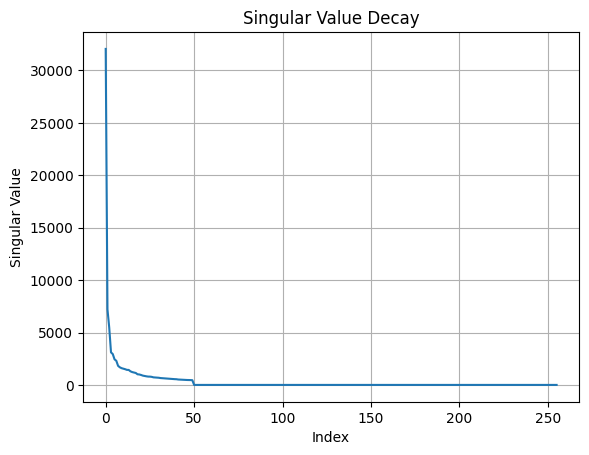

In [11]:
plt.plot(Se)
plt.title("Singular Value Decay")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()


In [12]:
from skimage.metrics import structural_similarity as ssim

# Normalize images to [0, 1] for SSIM
A_norm = A / 255.0
noisy_img_norm = noisy_img / 255.0
A_denoised_norm = A_denoised / 255.0
A_compressed_norm = A_compressed / 255.0

# SSIM Calculations
ssim_noisy = ssim(A_norm, noisy_img_norm, data_range=1.0)
ssim_denoised = ssim(A_norm, A_denoised_norm, data_range=1.0)
ssim_compressed = ssim(A_norm, A_compressed_norm, data_range=1.0)

print(f"SSIM between Original and Noisy Image:     {ssim_noisy:.4f}")
print(f"SSIM between Original and Denoised Image:  {ssim_denoised:.4f}")
print(f"SSIM between Original and Compressed Image: {ssim_compressed:.4f}")

SSIM between Original and Noisy Image:     0.6407
SSIM between Original and Denoised Image:  0.7095
SSIM between Original and Compressed Image: 0.8398
